#### The Knowledge Discovery in Databases (KDD) process involves a series of steps to extract valuable knowledge from large datasets. Here’s a detailed approach for the Spam Email Dataset using the KDD methodology, with explanations and corresponding code.

Dataset: https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset


## 1. Selection
Description: In this phase, we select the dataset that will be used for the analysis. For the Spam Email Dataset, we will load and examine its structure.


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/emails.csv')  # Adjust the path accordingly

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Check for class distribution
print(df['spam'].value_counts())


                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None
spam
0    4360
1    1368
Name: count, dtype: int64


## 2. Preprocessing
Description: This phase involves cleaning and preparing the data for analysis. For text data, this includes handling missing values, text normalization (e.g., removing punctuation, converting to lowercase), and splitting the dataset into training and testing sets.

In [6]:
from sklearn.model_selection import train_test_split
import re

# Check for missing values
print(df.isnull().sum())

# Fill missing values if necessary (in this case, we can drop them)
df.dropna(inplace=True)

# Text preprocessing function
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply text preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Split the dataset into features and target variable
X = df['text']  # Features
y = df['spam']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


text    0
spam    0
dtype: int64


## 3. Transformation
Description: This phase involves transforming the data into a suitable format for mining. For text data, we typically convert the text into numerical representations using techniques such as TF-IDF or Count Vectorization.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

# Check the shape of the transformed data
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(4582, 33813)
(1146, 33813)


## 4. Data Mining
Description: This phase involves applying data mining techniques to extract patterns from the data. In this case, we will train a classification model to detect spam emails.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")


Confusion Matrix:
[[856   0]
 [ 46 244]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       856
           1       1.00      0.84      0.91       290

    accuracy                           0.96      1146
   macro avg       0.97      0.92      0.94      1146
weighted avg       0.96      0.96      0.96      1146


Accuracy Score: 0.9599


## 5. Interpretation
Description: In this phase, we interpret the results of the data mining process. This includes understanding the model's performance, analyzing the feature importance, and drawing conclusions from the findings.

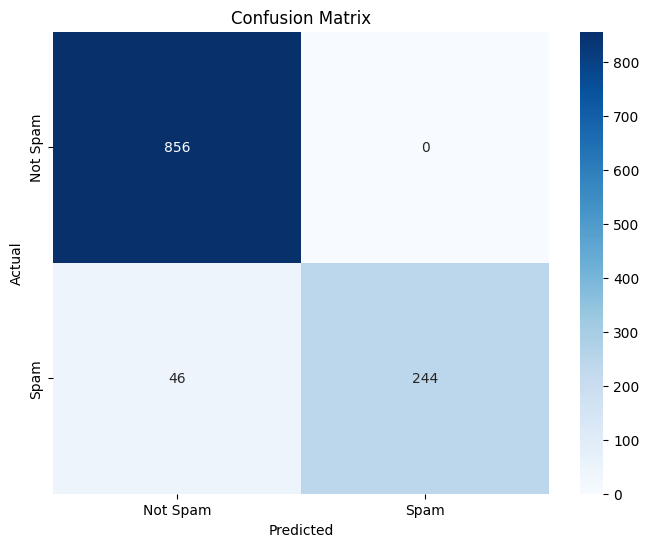

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance can be assessed by inspecting the most common words in spam vs. not spam
# This can be done by inspecting the coefficients of the model, if using a linear model,
# or by looking at the features with highest scores in a tree-based model.


## 6. Evaluation
Description: This phase assesses the entire KDD process, including the quality of the knowledge discovered and whether it meets the initial objectives.

In [10]:
# Print overall model accuracy
print(f"Final Model Accuracy: {accuracy:.4f}")

Final Model Accuracy: 0.9599
